    PART 2: Identify the three providers that are least similar to other providers and the the three regions that 
    are least similar to other region

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats
import pandas_profiling

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True

from matplotlib.backends.backend_pdf import PdfPages
from sklearn.cluster import KMeans

# center and scale the data
from sklearn.preprocessing import StandardScaler

In [16]:
Medicare_Provider_Charge_In = pd.read_csv('Medicare_Provider_Charge_Inpatient_DRG100_FY2011.csv')
Medicare_Provider_Charge_Out = pd.read_csv('Medicare_Provider_Charge_Outpatient_APC30_CY2011_v2.csv')

In [17]:
Medicare_Provider_Charge_In.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
DRG Definition                                163065 non-null object
Provider Id                                   163065 non-null int64
Provider Name                                 163065 non-null object
Provider Street Address                       163065 non-null object
Provider City                                 163065 non-null object
Provider State                                163065 non-null object
Provider Zip Code                             163065 non-null int64
Hospital Referral Region (HRR) Description    163065 non-null object
Total Discharges                              163065 non-null int64
Average Covered Charges                       163065 non-null float64
Average Total Payments                        163065 non-null float64
Average Medicare Payments                     163065 non-null float64
dtypes: float64(3), int64(3), object(6)
memory usage: 11.2+ M

In [18]:
Medicare_Provider_Charge_Out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43372 entries, 0 to 43371
Data columns (total 11 columns):
APC                                           43372 non-null object
Provider Id                                   43372 non-null int64
Provider Name                                 43372 non-null object
Provider Street Address                       43372 non-null object
Provider City                                 43372 non-null object
Provider State                                43372 non-null object
Provider Zip Code                             43372 non-null int64
Hospital Referral Region (HRR) Description    43372 non-null object
Outpatient Services                           43372 non-null int64
Average  Estimated Submitted Charges          43372 non-null float64
Average Total Payments                        43372 non-null float64
dtypes: float64(2), int64(3), object(6)
memory usage: 2.6+ MB


In [19]:
Medicare_Provider_Charge_In.isnull().any()

DRG Definition                                False
Provider Id                                   False
Provider Name                                 False
Provider Street Address                       False
Provider City                                 False
Provider State                                False
Provider Zip Code                             False
Hospital Referral Region (HRR) Description    False
Total Discharges                              False
Average Covered Charges                       False
Average Total Payments                        False
Average Medicare Payments                     False
dtype: bool

In [20]:
Medicare_Provider_Charge_Out.isnull().any()

APC                                           False
Provider Id                                   False
Provider Name                                 False
Provider Street Address                       False
Provider City                                 False
Provider State                                False
Provider Zip Code                             False
Hospital Referral Region (HRR) Description    False
Outpatient Services                           False
Average  Estimated Submitted Charges          False
Average Total Payments                        False
dtype: bool

In [7]:
pandas_profiling.ProfileReport(Medicare_Provider_Charge_In)

In [8]:
pandas_profiling.ProfileReport(Medicare_Provider_Charge_Out)

    Based on the data profiling; I subset the columns to be used for further processing -
    
####    Columns to be used to process inpatient data-
        'DRG Definition', 'Provider Name', 'Provider State', 'Hospital Referral Region (HRR) Description',
        'Total Discharges', 'Average Covered Charges' and 'Average Total Payments'
        
####    Columns to be used to process outpatient data -
        'APC', 'Provider Name', 'Provider State', 'Hospital Referral Region (HRR) Description',
        'Outpatient Services', 'Average  Estimated Submitted Charges' and 'Average Total Payments'       

    Subsetting and renaming columns to be used for further processing

In [21]:
Medicare_In_data = Medicare_Provider_Charge_In[['DRG Definition', 'Provider Name', 'Provider State', 'Hospital Referral Region (HRR) Description',
                                              'Total Discharges', 'Average Covered Charges', 'Average Total Payments' ]]

In [22]:
Medicare_In_data.rename(columns={'DRG Definition' : 'Procedures', 'Hospital Referral Region (HRR) Description' : 'Region',
                                 'Total Discharges' : 'Count Of Services', 'Average Covered Charges' : 'Charges',
                                 'Average Total Payments' : 'Payment'}, inplace = True)

In [23]:
Medicare_Out_data = Medicare_Provider_Charge_Out[['APC', 'Provider Name', 'Provider State', 'Hospital Referral Region (HRR) Description',
                                                 'Outpatient Services', 'Average  Estimated Submitted Charges', 'Average Total Payments' ]]

In [24]:
Medicare_Out_data.rename(columns={'APC' : 'Procedures', 'Hospital Referral Region (HRR) Description' : 'Region',
                                 'Outpatient Services' : 'Count Of Services', 'Average  Estimated Submitted Charges' : 'Charges',
                                 'Average Total Payments' : 'Payment'}, inplace = True)

    Concating inpatient and Outpatient data
                               

In [25]:
frames = [Medicare_In_data, Medicare_Out_data]
Medicare_data = pd.concat(frames)

In [26]:
Medicare_data.head(5)

Procedures                     Provider Name  \
0  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC  SOUTHEAST ALABAMA MEDICAL CENTER   
1  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC     MARSHALL MEDICAL CENTER SOUTH   
2  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC    ELIZA COFFEE MEMORIAL HOSPITAL   
3  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC                 ST VINCENT'S EAST   
4  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC     SHELBY BAPTIST MEDICAL CENTER   

  Provider State           Region  Count Of Services      Charges      Payment  
0             AL      AL - Dothan                 91  32963.07692  5777.241758  
1             AL  AL - Birmingham                 14  15131.85714  5787.571429  
2             AL  AL - Birmingham                 24  37560.37500  5434.958333  
3             AL  AL - Birmingham                 25  13998.28000  5417.560000  
4             AL  AL - Birmingham                 18  31633.27778  5658.333333

In [27]:
Medicare_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206437 entries, 0 to 43371
Data columns (total 7 columns):
Procedures           206437 non-null object
Provider Name        206437 non-null object
Provider State       206437 non-null object
Region               206437 non-null object
Count Of Services    206437 non-null int64
Charges              206437 non-null float64
Payment              206437 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 9.4+ MB


In [28]:
Medicare_data.isnull().any()

Procedures           False
Provider Name        False
Provider State       False
Region               False
Count Of Services    False
Charges              False
Payment              False
dtype: bool

In [29]:
Medicare_data['Charges'] = Medicare_data['Charges'].round(2)

In [30]:
Medicare_data['Payment'] = Medicare_data['Payment'].round(2)

In [31]:
Medicare_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206437 entries, 0 to 43371
Data columns (total 7 columns):
Procedures           206437 non-null object
Provider Name        206437 non-null object
Provider State       206437 non-null object
Region               206437 non-null object
Count Of Services    206437 non-null int64
Charges              206437 non-null float64
Payment              206437 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 9.4+ MB


    Grouping data by Provider and Region

    By Provider

In [32]:
Medicare_data_group_provider = Medicare_data.groupby(['Provider Name']).agg({'Procedures' :  'nunique',
                                                                                    'Provider State' : 'nunique', 
                                                                                    'Region': 'nunique',
                                                                                    'Count Of Services': 'sum' , 
                                                                                    'Charges': 'sum' , 
                                                                                    'Payment' : 'sum'})

In [33]:
Medicare_data_group_provider = Medicare_data_group_provider.reset_index()

In [34]:
Medicare_data_group_provider.head()

Provider Name  Procedures  Provider State  Region  \
0       ABBEVILLE GENERAL HOSPITAL          25               1       1   
1     ABBOTT NORTHWESTERN HOSPITAL         121               1       1   
2  ABILENE REGIONAL MEDICAL CENTER          71               1       1   
3       ABINGTON MEMORIAL HOSPITAL         121               1       1   
4                    ACMH HOSPITAL          54               1       1   

   Count Of Services     Charges     Payment  
0               1294   314058.89   121115.80  
1              20810  4495571.85  1065438.89  
2               7285  3613719.38   516580.33  
3              19300  6832266.25  1027582.36  
4               4151   406719.05   199332.50

    By Region

In [35]:
Medicare_data_group_region = Medicare_data.groupby(['Region']).agg({'Procedures' :  'nunique',
                                                                                    'Provider State' : 'nunique', 
                                                                                    'Provider Name': 'nunique',
                                                                                    'Count Of Services': 'sum' , 
                                                                                    'Charges': 'sum' , 
                                                                                    'Payment' : 'sum'})

In [36]:
Medicare_data_group_region = Medicare_data_group_region.reset_index()

In [37]:
Medicare_data_group_region.head()

Region  Procedures  Provider State  Provider Name  \
0   AK - Anchorage         100               1              9   
1  AL - Birmingham         127               2             40   
2      AL - Dothan         122               3             10   
3  AL - Huntsville         125               2              8   
4      AL - Mobile         125               2             14   

   Count Of Services      Charges      Payment  
0              31406   9427445.52   3390445.95  
1             166237  68364063.11  14648212.20  
2              43700   9561883.16   2419670.08  
3              71691  11754072.47   3090569.68  
4              70394  16193817.95   4256181.67

    K Means Clustering is exploratory data analysis technique. 
    This is non-hierarchical method of grouping objects together


    Euclidean  is one of the distance measures used on K Means algorithm.
    Euclidean distance between of a observation and initial cluster centroids  1 and 2 is calculated. 
    Based on euclidean distance each observation is assigned to one of the clusters - based on minimum distance.

###    Creating the cluster at Provider level to identify the providers with least similarity

    Creating data for fitting into cluster analysis

In [38]:
Medicare_data_group_provider_num = Medicare_data_group_provider.select_dtypes(include =['int64', 'float64']).copy()

In [39]:
col_list_prov = Medicare_data_group_provider_num.columns

    Standardizing the data

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
sc=StandardScaler()

In [42]:
Medicare_provider_scaled=sc.fit_transform(Medicare_data_group_provider_num)

    Applying PCA    

In [43]:
from sklearn.decomposition import PCA

In [44]:
var_ratio={}
pc = PCA(n_components=3)
Medicare_provider_pca=pc.fit(Medicare_provider_scaled)
var_ratio[5]=sum(Medicare_provider_pca.explained_variance_ratio_)

In [45]:
reduced_cr=pc.fit_transform(Medicare_provider_scaled)

In [46]:
var_ratio

{5: 0.9459627950199216}

In [47]:
reduced_cr.shape

(3201, 3)

In [48]:
Medicare_provider_scaled.shape

(3201, 6)

In [49]:
pd.DataFrame(pc.components_.T, columns=['PC_' + str(i) for i in range(3)], index=col_list_prov)

PC_0      PC_1      PC_2
Procedures         0.428081 -0.397857 -0.197239
Provider State     0.356879  0.591702  0.086489
Region             0.361007  0.589502  0.074693
Count Of Services  0.289998 -0.288352  0.896801
Charges            0.464627 -0.172105 -0.354212
Payment            0.509000 -0.176972 -0.135345

In [50]:
pd.Series(pc.explained_variance_ratio_,index=['PC_' + str(i) for i in range(3)])

PC_0    0.564617
PC_1    0.261370
PC_2    0.119976
dtype: float64

    Clustering

#### Silhouette Coefficient

In [51]:
from sklearn import metrics

In [52]:
k_range = range(3, 25)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(Medicare_provider_scaled)
    scores.append(metrics.silhouette_score(Medicare_provider_scaled, km.labels_))

In [53]:
scores

[0.5201381226426041,
 0.5355898254291706,
 0.5516056228071895,
 0.45082940343251965,
 0.42797340558229646,
 0.4303737913206283,
 0.43126825936678764,
 0.3970413810656433,
 0.3947968630905731,
 0.3981160329508079,
 0.3995493931635747,
 0.3641874425060779,
 0.3620146675942216,
 0.354977869135085,
 0.3538026430711452,
 0.3547182671868381,
 0.3423794732353157,
 0.3333001017399225,
 0.34624253597643323,
 0.3254703247980172,
 0.33151708272118985,
 0.3336523596345948]

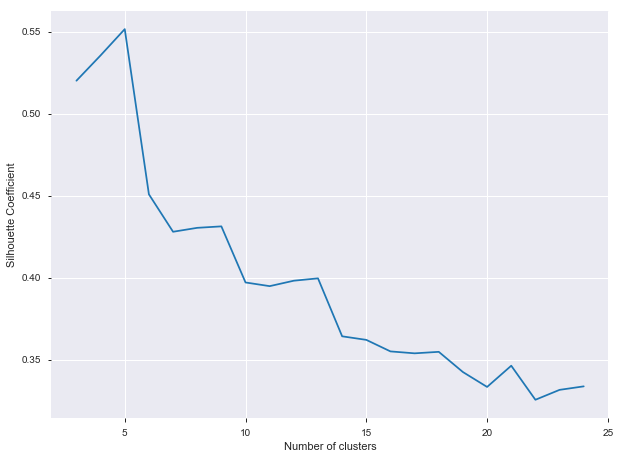

In [54]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

    We will be using Silhouette Coefficient to get the most scattered cluster i.e. least coeffient 
    to get the outliers
    
    Using 22 custers for cluster analysis since it is having least coeffcient

#### For 22 cluster Solution behavior  -

In [55]:
from sklearn.cluster import KMeans

In [56]:
km_22=KMeans(n_clusters=22,random_state=123)

In [57]:
km_22.fit(reduced_cr)
km_22.labels_

array([ 7, 16,  1, ..., 20, 18, 20])

In [58]:
pd.Series(km_22.labels_).value_counts()

7     554
20    517
0     437
14    377
1     361
18    328
16    200
4     146
10     93
15     38
5      31
12     29
9      22
11     22
3      13
13     12
6       6
2       5
21      4
17      3
8       2
19      1
dtype: int64

    From the scatter plot we can clearly see cluster 19 with 1 dot and custer 8 with 2 dots are outliers

Text(0.5, 0, 'PC_22')

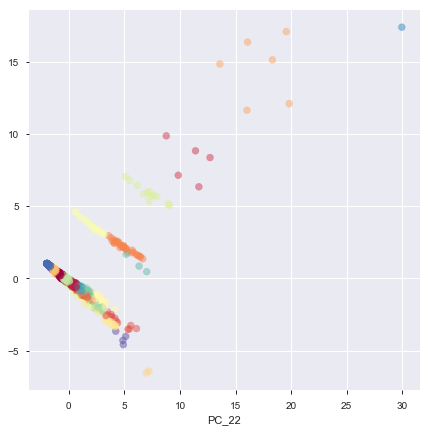

In [59]:
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0], reduced_cr[:,1], c=km_22.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_22')

In [60]:
cluster_df_22=pd.concat([Medicare_data_group_provider, pd.Series(km_22.labels_, name='Cluster_22')], axis=1)

In [74]:
cluster_df_22.to_csv('PART2_PROVIDER_CLUSTER.csv')

    Based on the cluster analysis follwing Providers stands out as least similar to other providers by K-MEANS Analysis
        
    GOOD SAMARITAN HOSPITAL - 
                                the charges for procuders are highest as compared to other providers; 
                                also it is available at 6 states and 8 regions
                                
    CLEVELAND CLINIC and SCOTT & WHITE MEMORIAL HOSPITAL -
                                they offer highest number of procedures (APC + DRG)

### Creating the cluster at Region level to identify the region with least similarity

In [62]:
Medicare_data_group_region.head()

Region  Procedures  Provider State  Provider Name  \
0   AK - Anchorage         100               1              9   
1  AL - Birmingham         127               2             40   
2      AL - Dothan         122               3             10   
3  AL - Huntsville         125               2              8   
4      AL - Mobile         125               2             14   

   Count Of Services      Charges      Payment  
0              31406   9427445.52   3390445.95  
1             166237  68364063.11  14648212.20  
2              43700   9561883.16   2419670.08  
3              71691  11754072.47   3090569.68  
4              70394  16193817.95   4256181.67

    Creating data for fitting into cluster analysis

In [63]:
Medicare_data_group_region_num = Medicare_data_group_region.select_dtypes(include =['int64', 'float64']).copy()

In [64]:
col_list_reg = Medicare_data_group_region_num.columns

    Standardizing the data

In [65]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Medicare_region_scaled=sc.fit_transform(Medicare_data_group_region_num)

    Applying PCA

In [66]:
from sklearn.decomposition import PCA

In [67]:
var_ratio={}
pc = PCA(n_components=4)
Medicare_region_pca=pc.fit(Medicare_region_scaled)
var_ratio[4]=sum(Medicare_region_pca.explained_variance_ratio_)

In [68]:
reduced_cr_1=pc.fit_transform(Medicare_region_scaled)

In [69]:
var_ratio


{4: 0.9665519044327815}

In [70]:
reduced_cr_1.shape

(306, 4)

In [71]:
Medicare_region_scaled.shape

(306, 6)

In [72]:
pd.DataFrame(pc.components_.T, columns=['PC_' + str(i) for i in range(4)], index=col_list_reg)

PC_0      PC_1      PC_2      PC_3
Procedures         0.317197  0.294480 -0.859202 -0.271965
Provider State     0.117119  0.919499  0.334287  0.079286
Provider Name      0.486000  0.004980  0.219587 -0.151846
Count Of Services  0.424189 -0.090060 -0.149066  0.852557
Charges            0.467551 -0.192563  0.227669 -0.410366
Payment            0.500932 -0.150287  0.166591 -0.037931

In [73]:
pd.Series(pc.explained_variance_ratio_,index=['PC_' + str(i) for i in range(4)])

PC_0    0.607834
PC_1    0.170807
PC_2    0.115609
PC_3    0.072302
dtype: float64

    Clustering

#### Silhouette Coefficient

In [75]:
from sklearn import metrics

In [76]:
k_range = range(3, 22)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(Medicare_region_scaled)
    scores.append(metrics.silhouette_score(Medicare_region_scaled, km.labels_))

In [77]:
scores

[0.3146946159599266,
 0.3872393086154885,
 0.4059540045327712,
 0.41658342481589783,
 0.36023564426745114,
 0.37360785183968087,
 0.33181860209848074,
 0.35922684225522306,
 0.32486144020671803,
 0.30874692258485,
 0.34302864297751723,
 0.332025356155216,
 0.35062408446566795,
 0.33524894444045594,
 0.3416901475879374,
 0.310772771544994,
 0.3181120783799598,
 0.3129355237199369,
 0.31127906990287807]

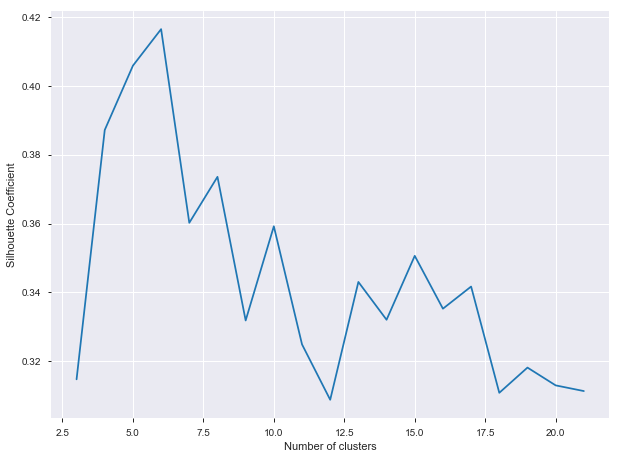

In [78]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

    We will be using Silhouette Coefficient to get the most scattered cluster i.e. least coeffient 
    to get the outliers.
    
    Here 20 touches the least coefficent.

In [79]:
from sklearn.cluster import KMeans

km_20=KMeans(n_clusters=20,random_state=123)
km_20.fit(reduced_cr_1)
km_20.labels_
pd.Series(km_20.labels_).value_counts()

4     63
1     45
2     33
19    29
6     29
0     17
14    16
12    15
15    11
18     9
13     8
3      8
11     6
10     4
16     4
9      4
5      2
8      1
7      1
17     1
dtype: int64

    We see cluster 7, 8 and 17 has only one region each making it least similar to other regions -

Text(0.5, 0, 'PC_20')

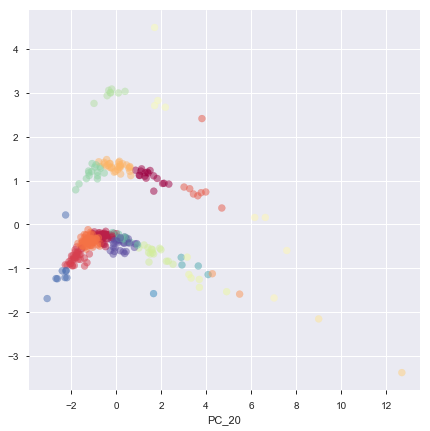

In [80]:
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr_1[:,0], reduced_cr_1[:,1], c=km_20.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_20')

In [81]:
cluster_df_20=pd.concat([Medicare_data_group_region, pd.Series(km_20.labels_, name='Cluster_20')], axis=1)

In [82]:
cluster_df_20.to_csv('PART2_REGION_CLUSTER.csv')

    Based on the cluster analysis follwing Regions stands out as least similar to other regions by K-MEANS Analysis
    
    CA - Los Angeles
    MA - Boston
    MD - Baltimore